In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn import linear_model
import statsmodels.api as sm
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
housing_df = pd.read_sql_query('select * from houseprices',con=engine)


engine.dispose()

In [2]:
housing_df.head(15)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


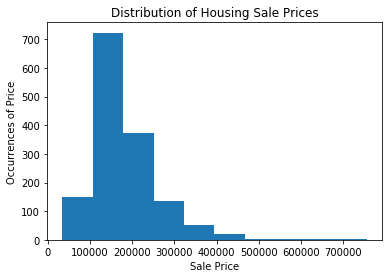

In [3]:
#Exploratory analysis
#Histogram of target variable - sale price
plt.hist(housing_df.saleprice)
plt.xlabel('Sale Price')
plt.ylabel('Occurrences of Price')
plt.title('Distribution of Housing Sale Prices')

plt.show()

The sale price has a skewed distribution.  As there is are higher occurrences of lower sales price and less occurrences of larger sale prices, the distribution is skewed right.  

In [4]:
#Create dummies for the categorical features

housing_df = pd.concat([housing_df,pd.get_dummies(housing_df.kitchenqual, prefix='kitchenqual', drop_first=True)], axis=1)
housing_df = pd.concat([housing_df,pd.get_dummies(housing_df.exterqual, prefix='exterqual', drop_first=True)], axis=1)

dummy_column_names = list(pd.get_dummies(housing_df.kitchenqual, prefix='kitchenqual', drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(housing_df.exterqual, prefix='exterqual', drop_first=True).columns)

In [5]:
#Setting variables for model
X = housing_df[['overallqual', 'grlivarea', 'garagecars'] + dummy_column_names]
Y = housing_df.saleprice

In [6]:
#LinearRegression model object from scikit-learn's linear_model module to use for G-M conditions
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 1.76818402e+04  4.86265831e+01  1.85643701e+04 -5.28157916e+04
 -4.10120899e+04 -5.13932710e+04 -5.86146872e+04 -4.15283034e+04
 -5.43026060e+04]

Intercept: 
 58461.34131830878


In [7]:
#Running regression model

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     567.3
Date:                Thu, 15 Aug 2019   Prob (F-statistic):               0.00
Time:                        07:57:07   Log-Likelihood:                -17443.
No. Observations:                1460   AIC:                         3.491e+04
Df Residuals:                    1450   BIC:                         3.496e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.846e+04   1.13e+04      5.189      0.000    3.64e+04    8.06e+04
overallqual     1.768e+04   1236.605     14.299      0.000    1.53e+04    2.01e+04
grlivarea         48.6266      2.369     20.530      0.000      43.980      53.273
garagecars      1.856e+04   1714.192     10.830      0.000    1.52e+04    2.19e+04
kitchenqual_Fa -5.282e+04   8556.765     -6.172      0.000   -6.96e+04    -3.6e+04
kitchenqual_Gd -4.101e+04   4909.002     -8.354      0.000   -5.06e+04   -3.14e+04
kitchenqual_TA -5.139e+04   5510.696     -9.326      0.000   -6.22e+04   -4.06e+04
exterqual_Fa   -5.861e+04   1.32e+04     -4.438      0.000   -8.45e+04   -3.27e+04
exterqual_Gd   -4.153e+04   6564.259     -6.326      0.000   -5.44e+04   -2.87e+04
exterqual_TA    -5.43e+04   7245.726     -7.494      0.000   -6.85e+04   -4.01e+04
==============================================================================
Omnibus:                      362.267   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21126.953
Skew:                           0.055   Prob(JB):                         0.00
Kurtosis:                      21.635   Cond. No.                     2.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Meeting Gauss-Markov Conditions

#### Assumption 1: linearity of the model in its coefficients - Condition Met

This model's functional form is linear.  

#### Assumption 2: the error term should be zero on average - Condition Met
The average error term is close to zero. Additionally, since there is a constant in the model, the error term is effectively zero and the condition is met.  

In [8]:
X = housing_df[['overallqual', 'grlivarea', 'garagecars'] + dummy_column_names]
Y = housing_df.saleprice

predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the housing prices model is: {}".format(np.mean(errors)))

Mean of the errors in the housing prices model is: 1.2757843487883267e-11


#### Assumption 3: homoscedasticity - Condition not met

Below are the Levene and Bartlett tests below to test for homoscedasticity.  Both tests p-value < 0.05.  Since this value is below 0.05, we reject the null hypothesis that are errors are homoscedastic.  Therefore the errors are heteroscedastic, and this condition is not met in the model. 

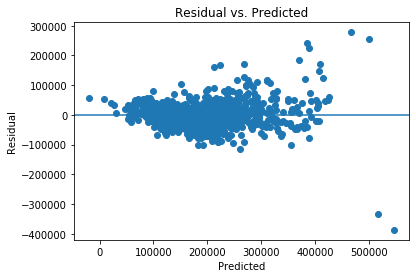

In [9]:
#Visually checking for homoscedasticity
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [10]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 543.248 and p value is 3.71e-120
Levene test statistic value is 445.906 and p value is 3.17e-92


#### Assumption 4: low multicollinearity - Conditions met
The correlation matrix shows that all of the explanatory variables are fairly correlated with each other.  Since they are not weak correlations, I could always drop one of the explanatory variables.  

In [11]:
housing_df[['overallqual', 'grlivarea', 'garagecars']].corr()

,overallqual,grlivarea,garagecars
overallqual,1.000000,0.593007,0.600671
grlivarea,0.593007,1.000000,0.467247
garagecars,0.600671,0.467247,1.000000


#### Assumption 5: error terms should be uncorrelated with one another - Condition Met

The plots show that the error terms are uncorrelated with each other.  

The autocorrelation between the error terms in the weather prediction model range between -0.07 and 0.07.

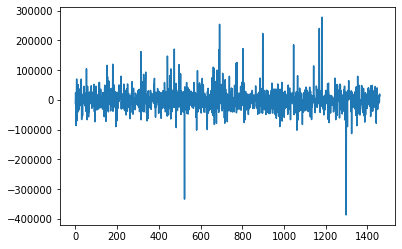

In [12]:
#Visualizing correlation bw error terms
plt.plot(errors)
plt.show()

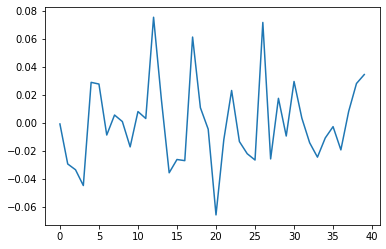

In [13]:
#Using autocorrelation function to determine if error terms are correlated
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

#### Assumption 6: features shouldn't be correlated with the errors - Condition Met 

The correlation matrix belows shows that the errors are essentially uncorrelated with the features.  

In [14]:
housing_df['errors'] = errors

housing_df[['overallqual', 'grlivarea', 'garagecars', 'errors'] + dummy_column_names].corr()

,overallqual,grlivarea,garagecars,errors,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,exterqual_Fa,exterqual_Gd,exterqual_TA
overallqual,1.000000e+00,5.930074e-01,6.006707e-01,6.645606e-15,-1.931810e-01,4.091336e-01,-5.538908e-01,-1.646630e-01,5.477312e-01,-6.462467e-01
grlivarea,5.930074e-01,1.000000e+00,4.672474e-01,4.330786e-15,-8.225700e-02,2.262529e-01,-3.501792e-01,-6.239580e-02,3.025158e-01,-3.861460e-01
garagecars,6.006707e-01,4.672474e-01,1.000000e+00,3.841881e-15,-2.156051e-01,3.375479e-01,-3.994490e-01,-1.198552e-01,4.249514e-01,-4.818253e-01
errors,6.645606e-15,4.330786e-15,3.841881e-15,1.000000e+00,-2.016215e-15,1.837621e-15,-3.217314e-15,-1.630728e-15,3.359047e-15,-4.224482e-15
kitchenqual_Fa,-1.931810e-01,-8.225700e-02,-2.156051e-01,-2.016215e-15,1.000000e+00,-1.356527e-01,-1.668053e-01,3.324097e-01,-1.173848e-01,5.951493e-02
kitchenqual_Gd,4.091336e-01,2.262529e-01,3.375479e-01,1.837621e-15,-1.356527e-01,1.000000e+00,-8.244565e-01,-8.056993e-02,6.283628e-01,-5.576053e-01
kitchenqual_TA,-5.538908e-01,-3.501792e-01,-3.994490e-01,-3.217314e-15,-1.668053e-01,-8.244565e-01,1.000000e+00,-1.473094e-02,-6.175980e-01,6.715999e-01
exterqual_Fa,-1.646630e-01,-6.239580e-02,-1.198552e-01,-1.630728e-15,3.324097e-01,-8.056993e-02,-1.473094e-02,1.000000e+00,-6.971988e-02,-1.258314e-01
exterqual_Gd,5.477312e-01,3.025158e-01,4.249514e-01,3.359047e-15,-1.173848e-01,6.283628e-01,-6.175980e-01,-6.971988e-02,1.000000e+00,-9.061206e-01
exterqual_TA,-6.462467e-01,-3.861460e-01,-4.818253e-01,-4.224482e-15,5.951493e-02,-5.576053e-01,6.715999e-01,-1.258314e-01,-9.061206e-01,1.000000e+00


#### Normality of error terms - Condition not met
The histogram of the error terms shows that the error terms are slightly right skewed.  The Jarque-Bera and Normality tests both have p-values <0.05 which indicates that the null hypotheses of normal distribution are rejected.  Therefore, the error terms are not normally distributed.  Since the error terms are non-normally distributed, the statistical signficance of the coefficients cannot be measured.

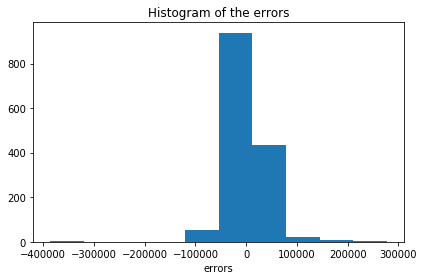

In [15]:
#Histogram to visualize explore normal distribution assumption of error terms
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [16]:
#Using Jarque-Bera and Normality tests to determine if error terms are normally distributed
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 21126.953402242267 and p value is 0.0
Normality test statistics is 362.26696922348873 and p value is 2.1613601763520967e-79
